# Projekt dot. Wskaźnika Szczęścia na Świecie
## Ranking z przedziału 2015-2019

## Autor: Filip Wałęga

# Przegląd Projektu
Celem tego projektu jest zbadanie i analiza Wskaźnika szczęścia na świecie. 


### Źródło danych: [kaggle.com](https://www.kaggle.com/datasets/unsdsn/world-happiness/)

### System operacyjny na którym pracuje: Ubuntu LTS - Linux


#### Importowanie i aliasowanie

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

#### Wczytanie danych i sprawdzenie poprawności wczytania

In [37]:
data = pd.read_csv(os.path.join(os.curdir, 'data', '2015.csv'))
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Podstawowa analiza, żeby zobaczyć jak wyglądają dane ogólnie

In [38]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### Sprawdzenie NULL | NAN | NA

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Jeszcze spójrzmy na typy danych

In [40]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#### Sprawdźmy czy napewno nie ma jakiegoś NA

In [41]:
data[data.isna()].dropna()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


#### Wygląda na to, że nasze dane są bardzo dobrze uzupełnione
#### Jedyne co trzeba było zrobić to poprawić nazwy kolumn pomiędzy latami
#### Zrobiłem to ręcznie, ponieważ tak było najprościej, a po co komplikować?



## Analiza wykresów


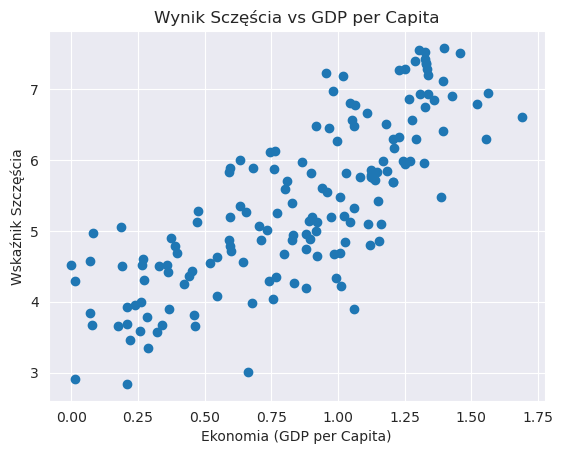

In [42]:
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'])
plt.xlabel('Ekonomia (GDP per Capita)')
plt.ylabel('Wskaźnik Szczęścia')
plt.title('Wynik Sczęścia vs GDP per Capita')
plt.show()

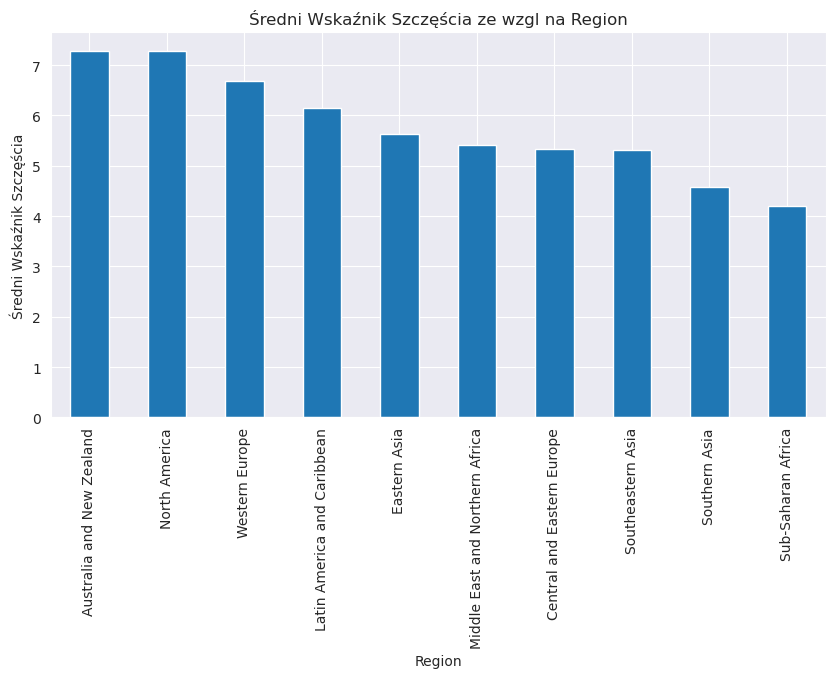

In [43]:
# Average happiness score by region
region_grouped = data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
region_grouped.plot(kind='bar', figsize=(10,5))
plt.ylabel('Średni Wskaźnik Szczęścia')
plt.title('Średni Wskaźnik Szczęścia ze wzgl na Region')
plt.show()


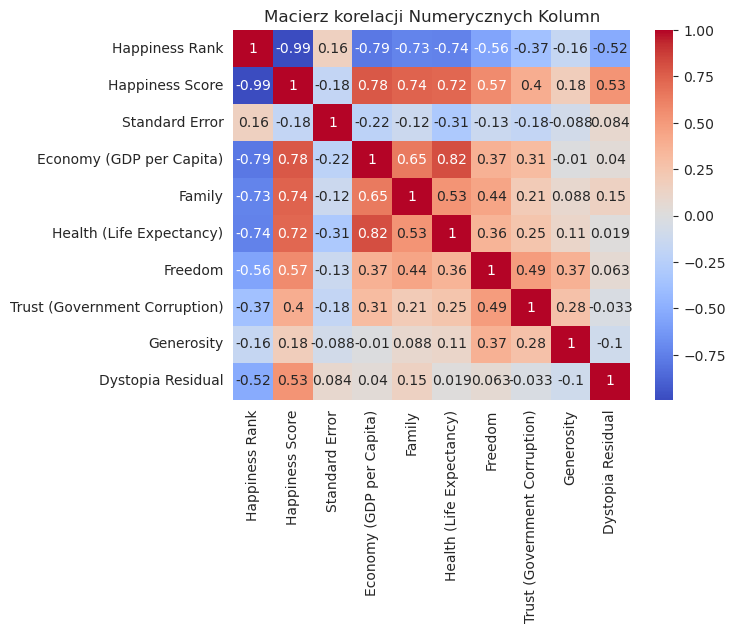

In [44]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji Numerycznych Kolumn')
plt.show()


<Axes: xlabel='Happiness Score'>

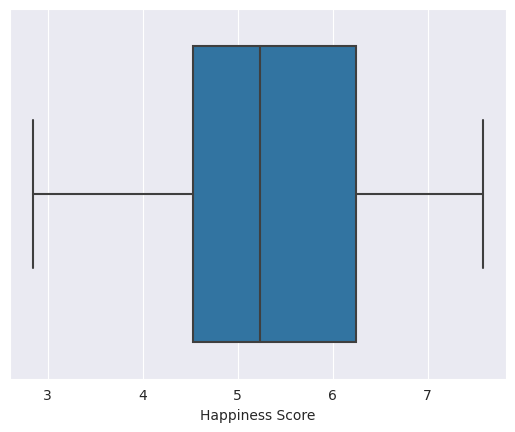

In [45]:
sns.boxplot(x=data['Happiness Score'])

#### Teraz wczytajmy dane z wszystkich lat do listy

In [46]:

datasets = []
for i in range(2015, 2020):
    datasets.append(pd.read_csv(os.path.join(os.curdir, "data", f"{i}.csv")))
for i, dataset in enumerate(datasets):
    year = 2015 + i
    dataset['Year'] = year


#### Sprawdźmy czy się wczytało

In [47]:
print(datasets[4])

     Happiness Rank                   Country  Happiness Score  \
0                 1                   Finland            7.769   
1                 2                   Denmark            7.600   
2                 3                    Norway            7.554   
3                 4                   Iceland            7.494   
4                 5               Netherlands            7.488   
..              ...                       ...              ...   
151             152                    Rwanda            3.334   
152             153                  Tanzania            3.231   
153             154               Afghanistan            3.203   
154             155  Central African Republic            3.083   
155             156               South Sudan            2.853   

     Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
0                       1.340   1.587                     0.986    0.596   
1                       1.383   1.573                  

#### Połączymy to wszystko w jeden zbiór i sprawdzimy czy wszystko jest okej

In [48]:
combined_data = pd.concat(datasets, ignore_index=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           782 non-null    int

#### Czas na wykresy

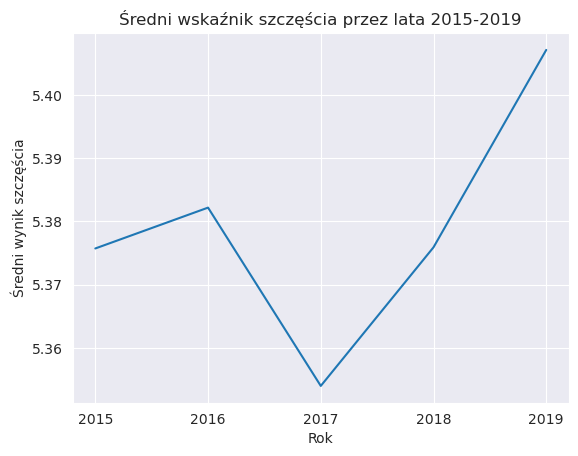

In [49]:
average_happiness_per_year = combined_data.groupby('Year')['Happiness Score'].mean()
average_happiness_per_year.plot(kind='line')
plt.title('Średni wskaźnik szczęścia przez lata 2015-2019')
plt.ylabel('Średni wynik szczęścia')
plt.xlabel('Rok')
plt.xticks([year for year in range(2015, 2020)])
plt.show()


## Zmiana pozycji krajów w rankingu na przestrzeni lat

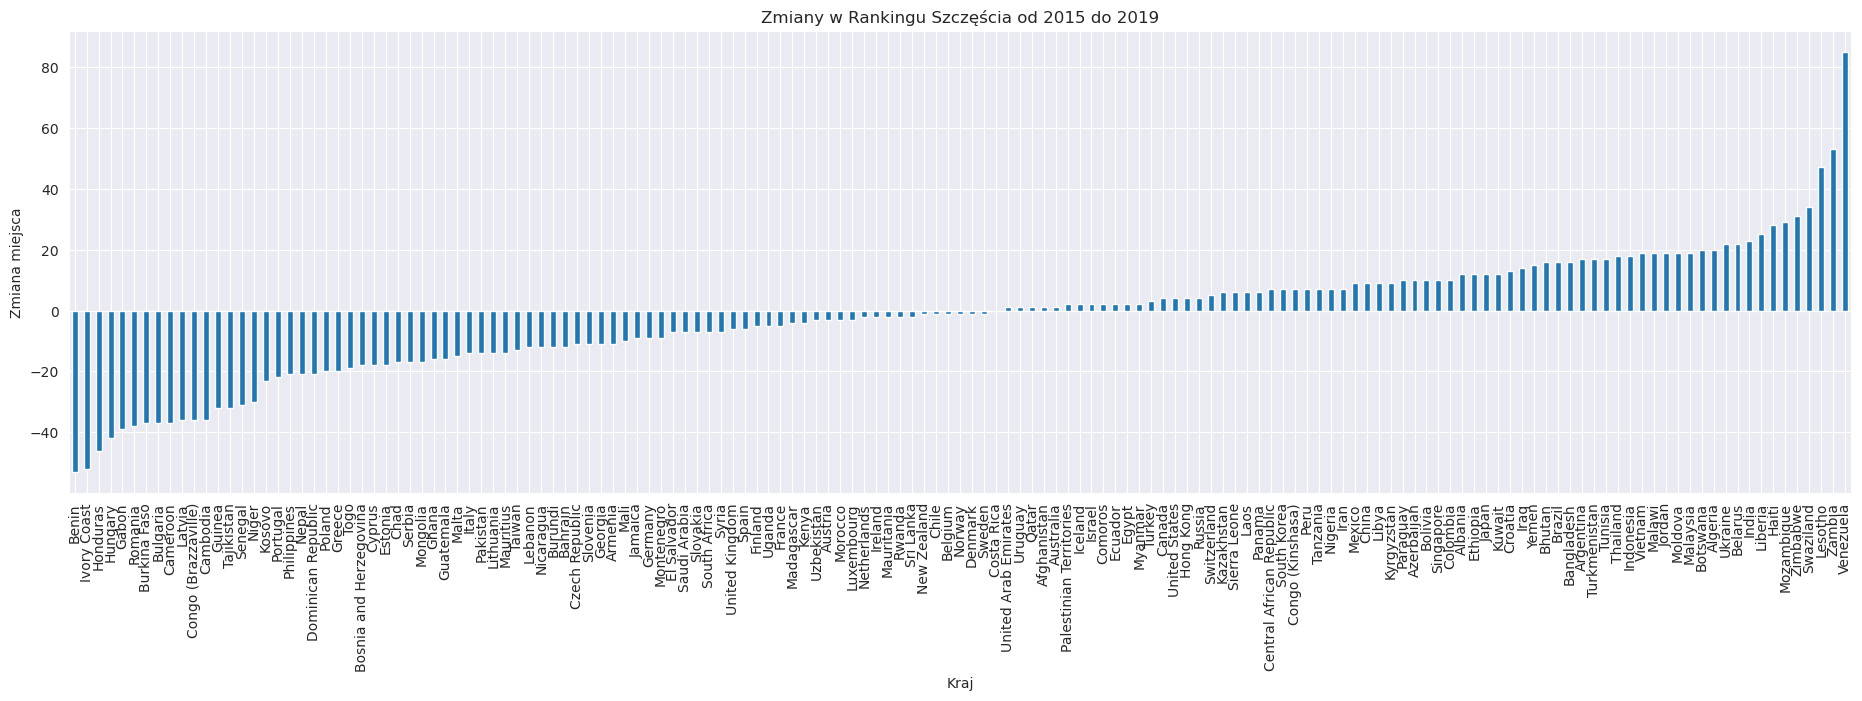

In [50]:
happiness_rank_change = combined_data.pivot(index='Country', columns='Year', values='Happiness Rank')
happiness_rank_change['Rank Change'] = happiness_rank_change[2019] - happiness_rank_change[2015]
happiness_rank_change['Rank Change'].sort_values().dropna().plot(kind='bar', figsize=(23,6))
plt.title('Zmiany w Rankingu Szczęścia od 2015 do 2019')
plt.ylabel('Zmiana miejsca')
plt.xlabel('Kraj')
plt.show()


#### Sprawdźmy od czego najbardziej zależą dane wyniki
zwróćmy uwagę na wiersz lub kolumne z Happiness Score

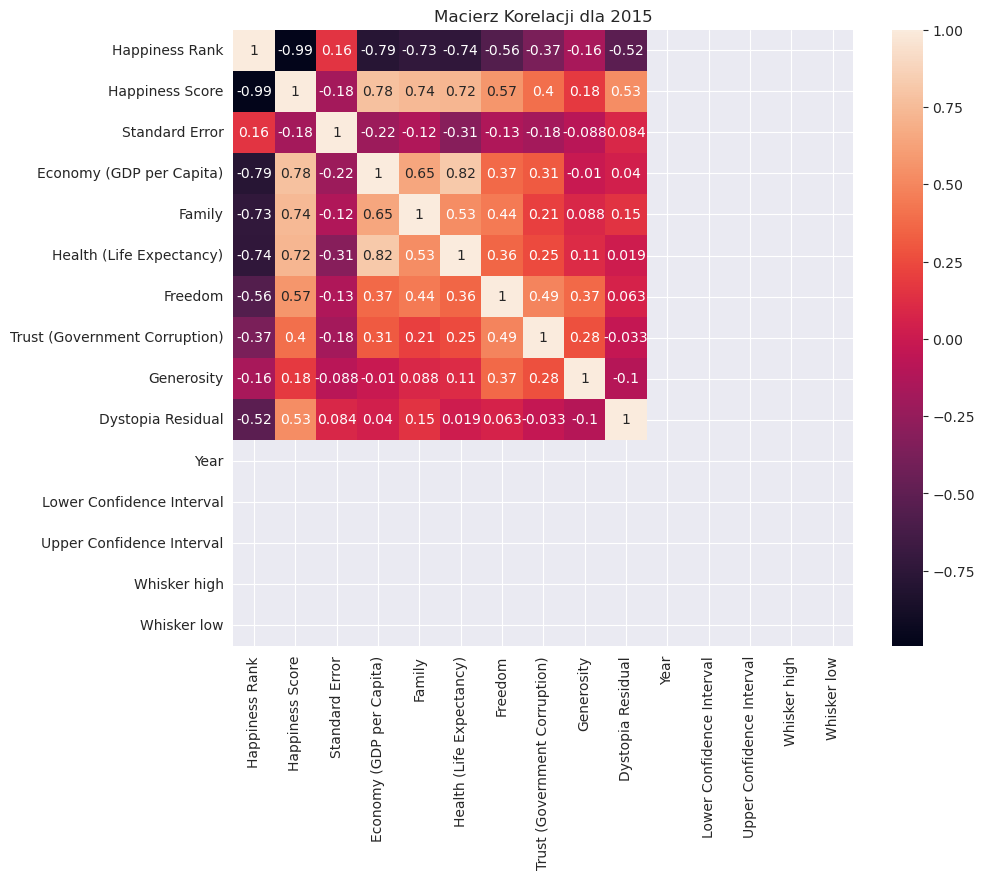

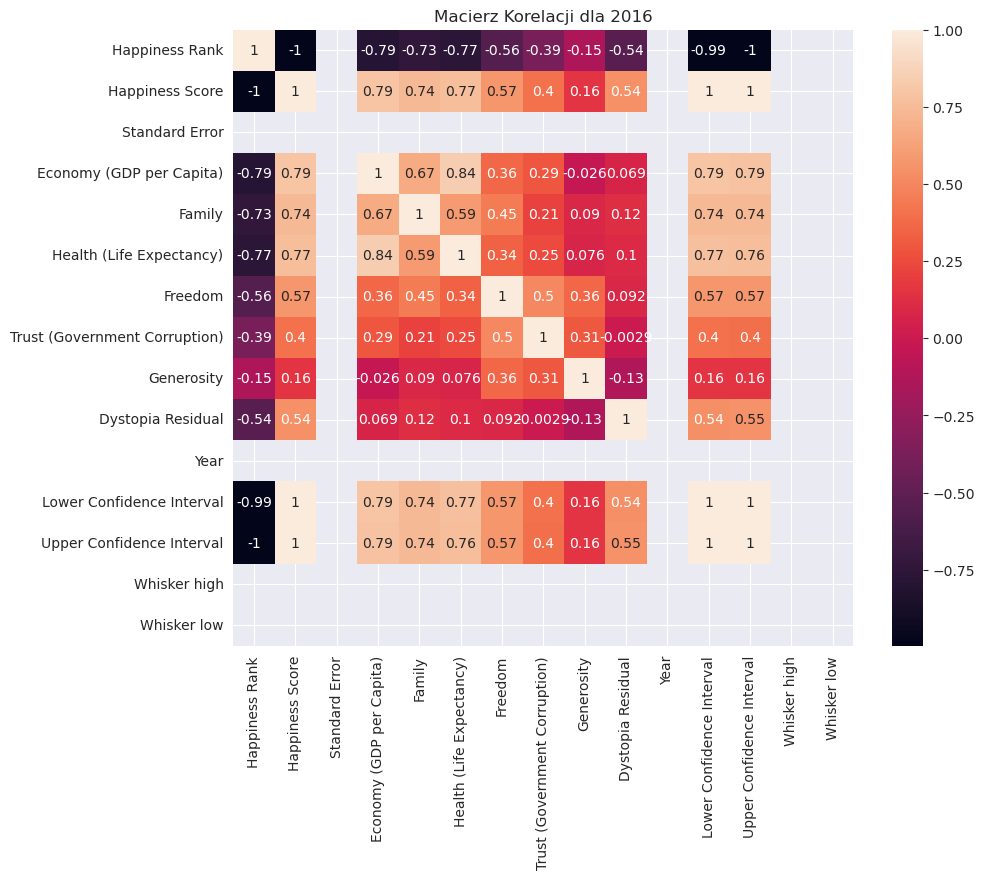

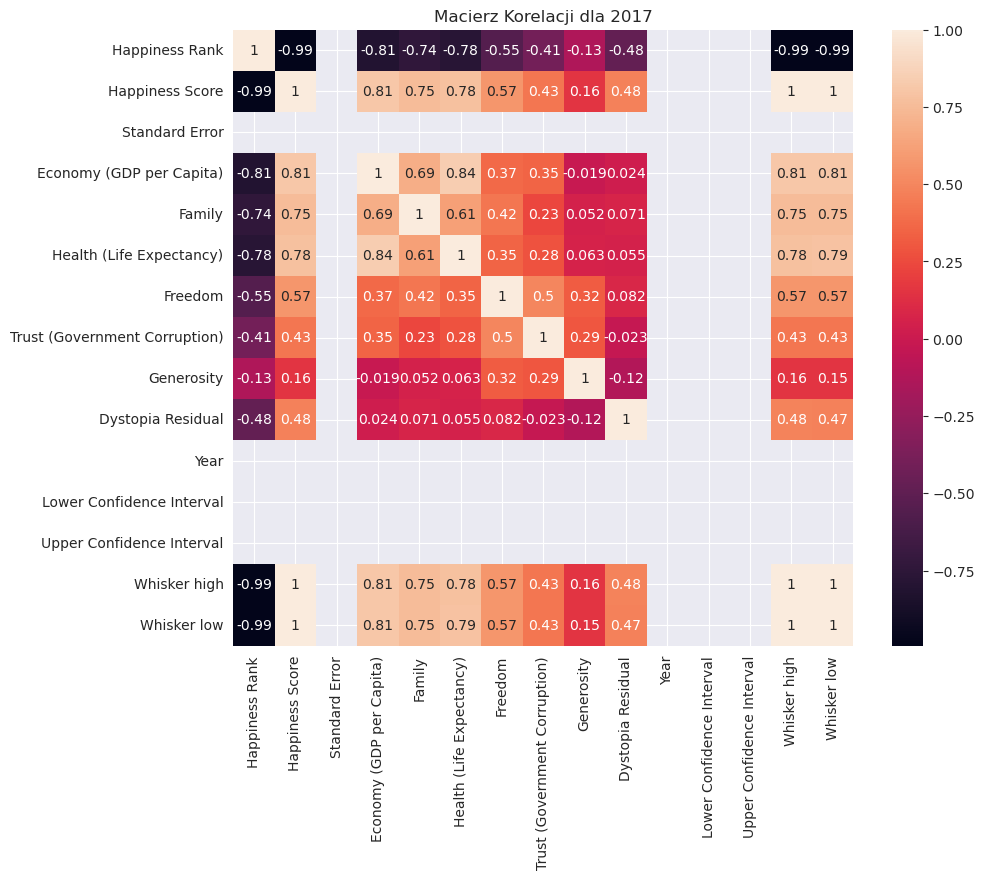

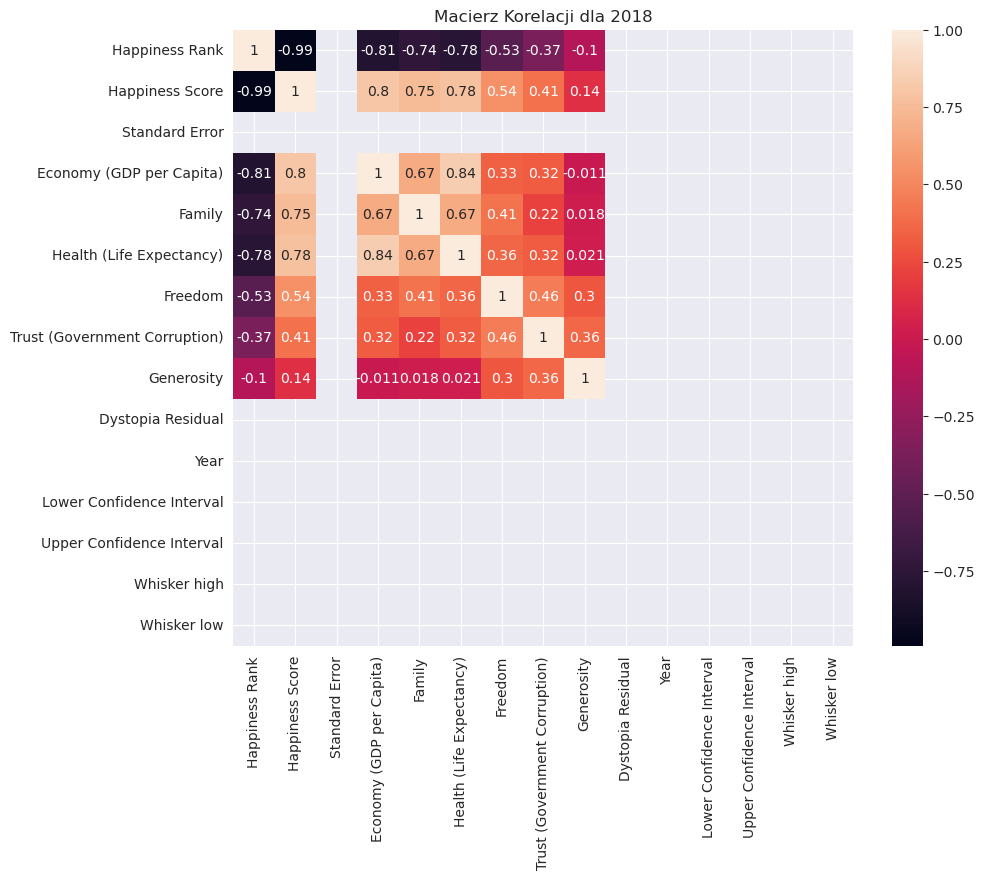

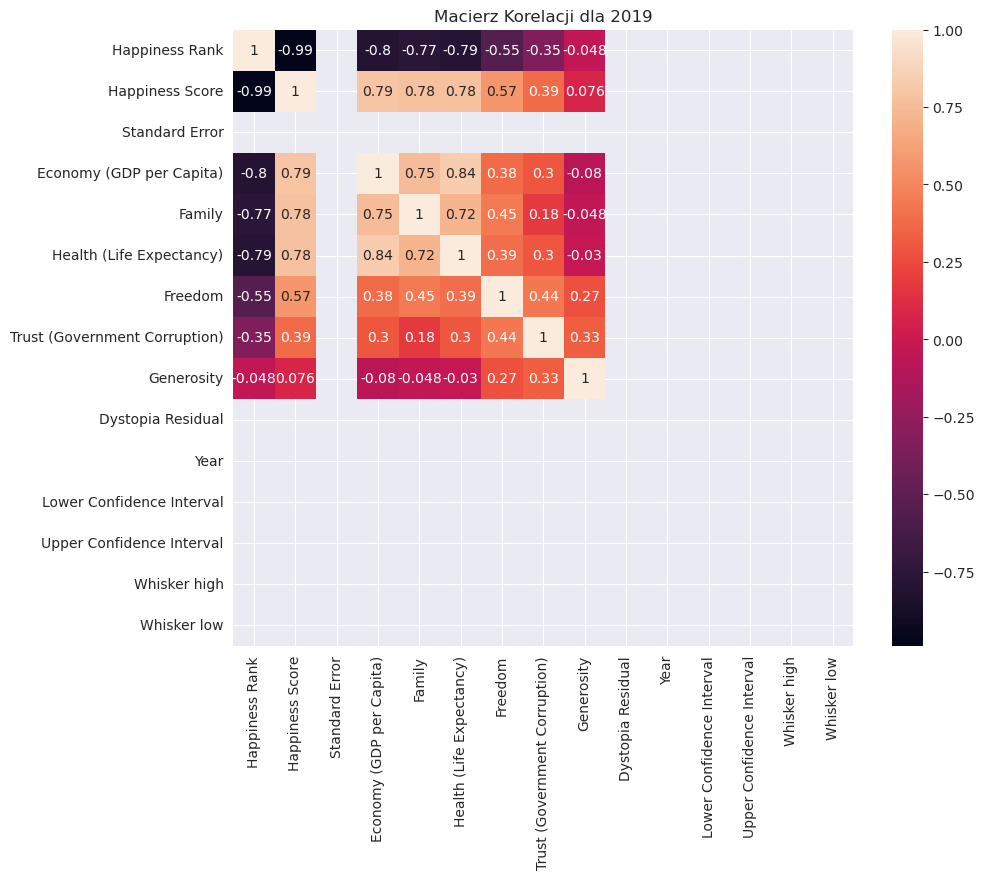

In [51]:
for year in range(2015, 2020):
    year_data = combined_data[combined_data['Year'] == year]
    correlation_matrix = numerical_data = year_data.select_dtypes(include=['int64', 'float64']).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True)
    plt.title(f'Macierz Korelacji dla {year}')
    plt.show()


<Axes: xlabel='Year', ylabel='Happiness Score'>

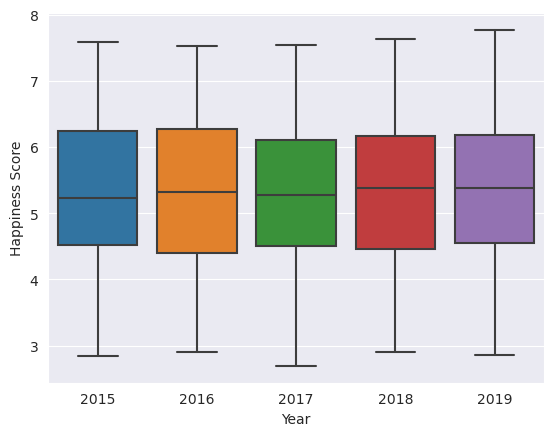

In [52]:
sns.boxplot(y=combined_data['Happiness Score'], x=combined_data['Year'])

<Axes: xlabel='Year', ylabel='Trust (Government Corruption)'>

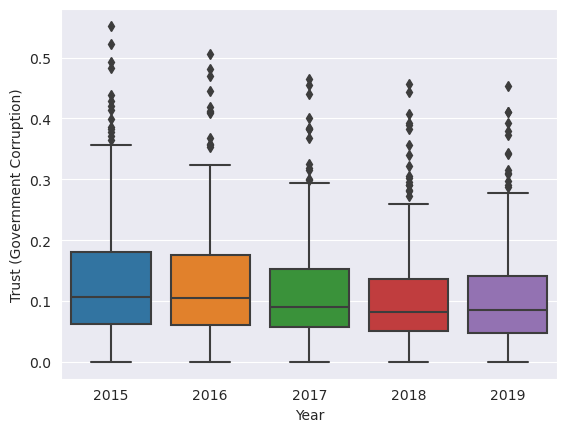

In [53]:
sns.boxplot(y=combined_data['Trust (Government Corruption)'], x=combined_data['Year'])

<Axes: xlabel='Year', ylabel='Family'>

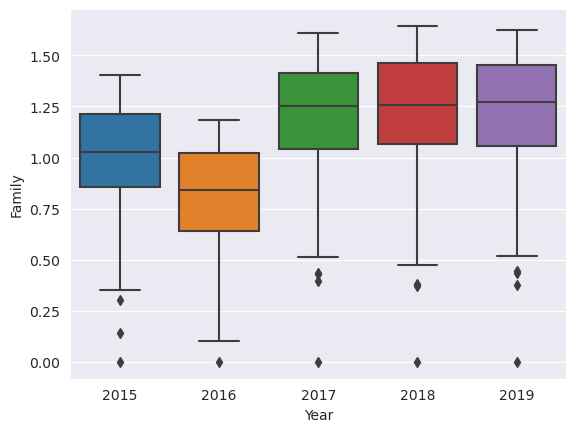

In [54]:
sns.boxplot(y=combined_data['Family'], x=combined_data['Year'])

<Axes: xlabel='Year', ylabel='Economy (GDP per Capita)'>

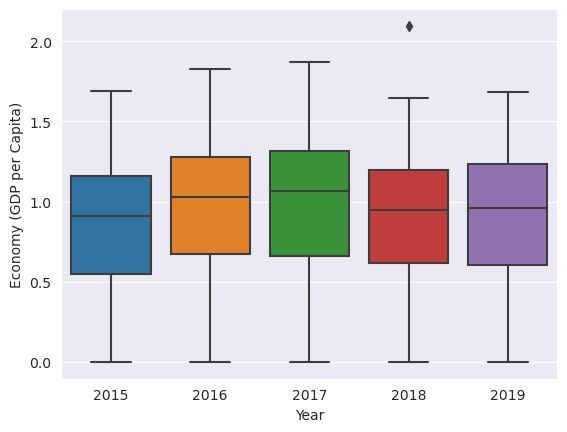

In [55]:
sns.boxplot(y=combined_data['Economy (GDP per Capita)'], x=combined_data['Year'])

<Axes: xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

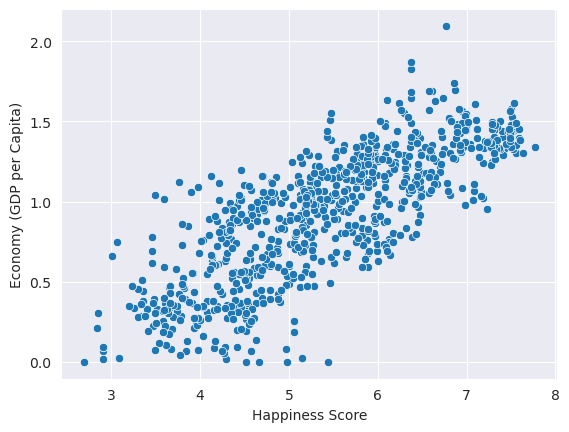

In [56]:
sns.scatterplot(x=combined_data['Happiness Score'], y=combined_data['Economy (GDP per Capita)'])

<Axes: xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

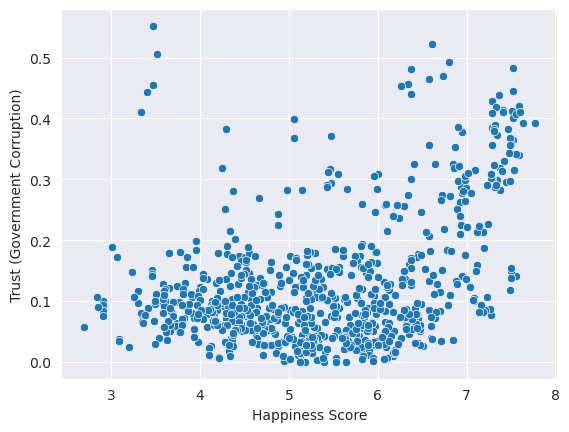

In [57]:
sns.scatterplot(x=combined_data['Happiness Score'], y=combined_data['Trust (Government Corruption)'])

<Axes: xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

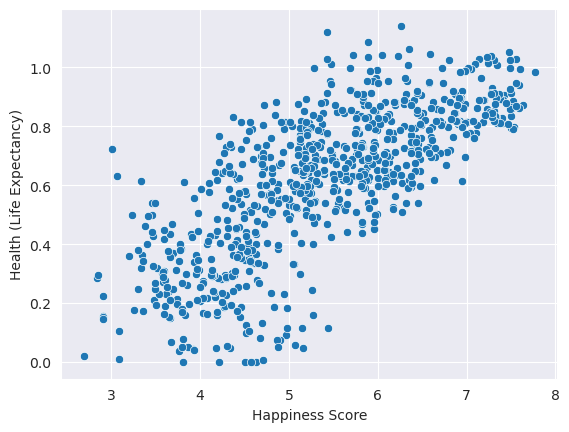

In [58]:
sns.scatterplot(x=combined_data['Happiness Score'], y=combined_data['Health (Life Expectancy)'])

<Axes: xlabel='Happiness Score', ylabel='Family'>

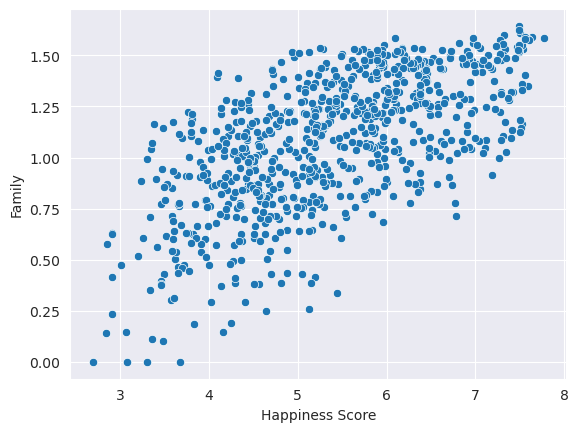

In [59]:
sns.scatterplot(x=combined_data['Happiness Score'], y=combined_data['Family'])

## TOP 1 Wskaźników Szczęścia na świecie w danym roku

In [60]:
most_happy_countries = combined_data.loc[combined_data.groupby('Year')['Happiness Score'].idxmax()]
print(most_happy_countries[['Year', 'Country', 'Happiness Score']])


     Year      Country  Happiness Score
0    2015  Switzerland            7.587
158  2016      Denmark            7.526
315  2017       Norway            7.537
470  2018      Finland            7.632
626  2019      Finland            7.769


## TOP 5 Wskaźników Szczęścia na świecie w danym roku

In [61]:
most_happy_countries = combined_data.loc[combined_data.groupby('Year')['Happiness Score'].nlargest(5).reset_index()["level_1"]].reset_index()
num = 0
print("TOP 5 'Happiness Score' Krajów w danym roku")
for row in most_happy_countries.itertuples():
    if (num%5) == 0:
        print(f"ROK {row[14]}")
    print(f"{num%5+1} - {row[2]} - {round(row[5], 3)}")
    num +=1

TOP 5 'Happiness Score' Krajów w danym roku
ROK 2015
1 - Switzerland - 7.587
2 - Iceland - 7.561
3 - Denmark - 7.527
4 - Norway - 7.522
5 - Canada - 7.427
ROK 2016
1 - Denmark - 7.526
2 - Switzerland - 7.509
3 - Iceland - 7.501
4 - Norway - 7.498
5 - Finland - 7.413
ROK 2017
1 - Norway - 7.537
2 - Denmark - 7.522
3 - Iceland - 7.504
4 - Switzerland - 7.494
5 - Finland - 7.469
ROK 2018
1 - Finland - 7.632
2 - Norway - 7.594
3 - Denmark - 7.555
4 - Iceland - 7.495
5 - Switzerland - 7.487
ROK 2019
1 - Finland - 7.769
2 - Denmark - 7.6
3 - Norway - 7.554
4 - Iceland - 7.494
5 - Netherlands - 7.488


## Odwrotny TOP 5 Wskaźników Szczęścia na świecie w danym roku

In [62]:
most_happy_countries = combined_data.loc[combined_data.groupby('Year')['Happiness Score'].nsmallest(5).reset_index()["level_1"]].reset_index()
num = 0
print("Odwrotny TOP 5 'Happiness Score' Krajów w danym roku")
for row in most_happy_countries.itertuples():
    if (num%5) == 0:
        print(f"ROK {row[14]}")
    print(f"{num%5+1} - {row[2]} - {round(row[5], 3)}")
    num +=1

Odwrotny TOP 5 'Happiness Score' Krajów w danym roku
ROK 2015
1 - Togo - 2.839
2 - Burundi - 2.905
3 - Syria - 3.006
4 - Benin - 3.34
5 - Rwanda - 3.465
ROK 2016
1 - Burundi - 2.905
2 - Syria - 3.069
3 - Togo - 3.303
4 - Afghanistan - 3.36
5 - Benin - 3.484
ROK 2017
1 - Central African Republic - 2.693
2 - Burundi - 2.905
3 - Tanzania - 3.349
4 - Syria - 3.462
5 - Rwanda - 3.471
ROK 2018
1 - Burundi - 2.905
2 - Central African Republic - 3.083
3 - South Sudan - 3.254
4 - Tanzania - 3.303
5 - Yemen - 3.355
ROK 2019
1 - South Sudan - 2.853
2 - Central African Republic - 3.083
3 - Afghanistan - 3.203
4 - Tanzania - 3.231
5 - Rwanda - 3.334


## Sprawdźmy jak się ma Polska
#### Wyswietle Finlandie dla porównania

#### 2015

In [63]:
data = pd.read_csv(os.path.join(os.curdir, "data", "2015.csv"))

In [64]:
data.sort_values("Happiness Score").where(data['Country'] == "Poland").dropna(axis=0, how='any')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
59,Poland,Central and Eastern Europe,60.0,5.791,0.04263,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759,1.86565


In [65]:
data.sort_values("Happiness Score").where(data['Country'] == "Finland").dropna(axis=0, how='any')


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
5,Finland,Western Europe,6.0,7.406,0.0314,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


#### 2019

In [66]:
data = pd.read_csv(os.path.join(os.curdir, "data", "2019.csv"))

In [67]:
data.sort_values("Happiness Score").where(data['Country'] == "Poland").dropna(axis=0, how='any')

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
39,40.0,Poland,6.182,1.206,1.438,0.884,0.483,0.117,0.05


In [68]:
data.sort_values("Happiness Score").where(data['Country'] == "Finland").dropna(axis=0, how='any')

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1.0,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


## Końcowe wnioski
- możemy zauważyć pewien rodzaj liniowości na wykresach (nie wszystkich)
- większość top 5 wskaźników zajmują kraję w których jest duży(nie największy) wskaźnik depresji 
- Polska nie ma się źle i jest coraz lepiej
- Rodziny gdzie jest więcej dzieci zazwyczaj są szczęśliwsze